In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_absolute_percentage_error # MAPE
from sklearn.metrics import r2_score # R square
import matplotlib.pyplot as plt
import seaborn as sns
# from pycaret.regression import *

## Data processing

In [3]:
def data_handle(filename):
    dataset = pd.read_csv(filename)
    dataset = dataset.rename(
        columns={'Measured Depth m': 'DEPTH', 'Weight on Bit kkgf': 'WOB', 'Average Standpipe Pressure kPa': 'SPP',
                 'Average Surface Torque kN.m': 'ST',
                 'Rate of Penetration m/h': 'ROP', 'Average Rotary Speed rpm': 'RPM', 'Mud Flow In L/min': 'MFI',
                 'Mud Density In g/cm3': 'MDI', 'Diameter mm': 'DIA',
                 'Average Hookload kkgf': 'HookLoad', 'Hole Depth (TVD) m': 'TVD', 'Gamma gAPI': 'UiSGamma'})
    dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
    dataset.drop(['TVD'], axis=1, inplace=True)
    col = list(dataset)
    #col = col[0:-1]
    col.insert(13, col.pop(col.index('ROP')))
    dataset = dataset.loc[0:, col]
    df = pd.DataFrame()
    df = df.append(dataset, ignore_index=True)
    #del df['Unnamed: 0']
    del df['FORMATION']
    # del df['DIA']
    return df

In [4]:
def evaluate_model(rf, df_1, df_2):
    X = df_1.iloc[:, 0:11]
    y = df_1.iloc[:, -1]
    # train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
    rf.fit(X, y)
    X_2 = df_2.iloc[:, 0:-1]
    y_2 = df_2.iloc[:, -1]

    train_predictions = rf.predict(X)
    test_predictions = rf.predict(X_2)
    return y, y_2, train_predictions, test_predictions

## Model training

In [5]:
## Follow the sequence of spud time for data accumulation 
## add one well for training at each time

In [6]:
MLlist = [RandomForestRegressor(), MLPRegressor(), AdaBoostRegressor()]
rf = MLlist[0]
well_info  = pd.read_excel('well_information.xlsx')
well_info =  well_info.sort_values(by = 'Spud date',ignore_index=True)
well_name_list = well_info['Alias']
font = {'size' : 14}  
matplotlib.rc('font', **font)

metric_field = pd.DataFrame(columns=['train_well', 'test_well', 'train_rmse', 
                                     'train_mape', 'train_r2', 'test_rmse', 'test_mape','test_r2'])

for well_name_index,well_name in enumerate(well_name_list):
    print(str(well_name_index) + ', ' + well_name)

0, UiS_F4
1, UiS_F12
2, UiS_F7
3, UiS_F9
4, UiS_F5
5, UiS_F14
6, UiS_F15A
7, UiS_F10
8, UiS_F9A


UiS_F4,
UiS_F12
train_rmse: 0.17504226121729896
train_mape: 0.0003968834386227382
train_r2: 0.9999273453938059
test_rmse: 34.17992475603077
test_mape: 4.350300600862458
test_r2: -3.086210940114565


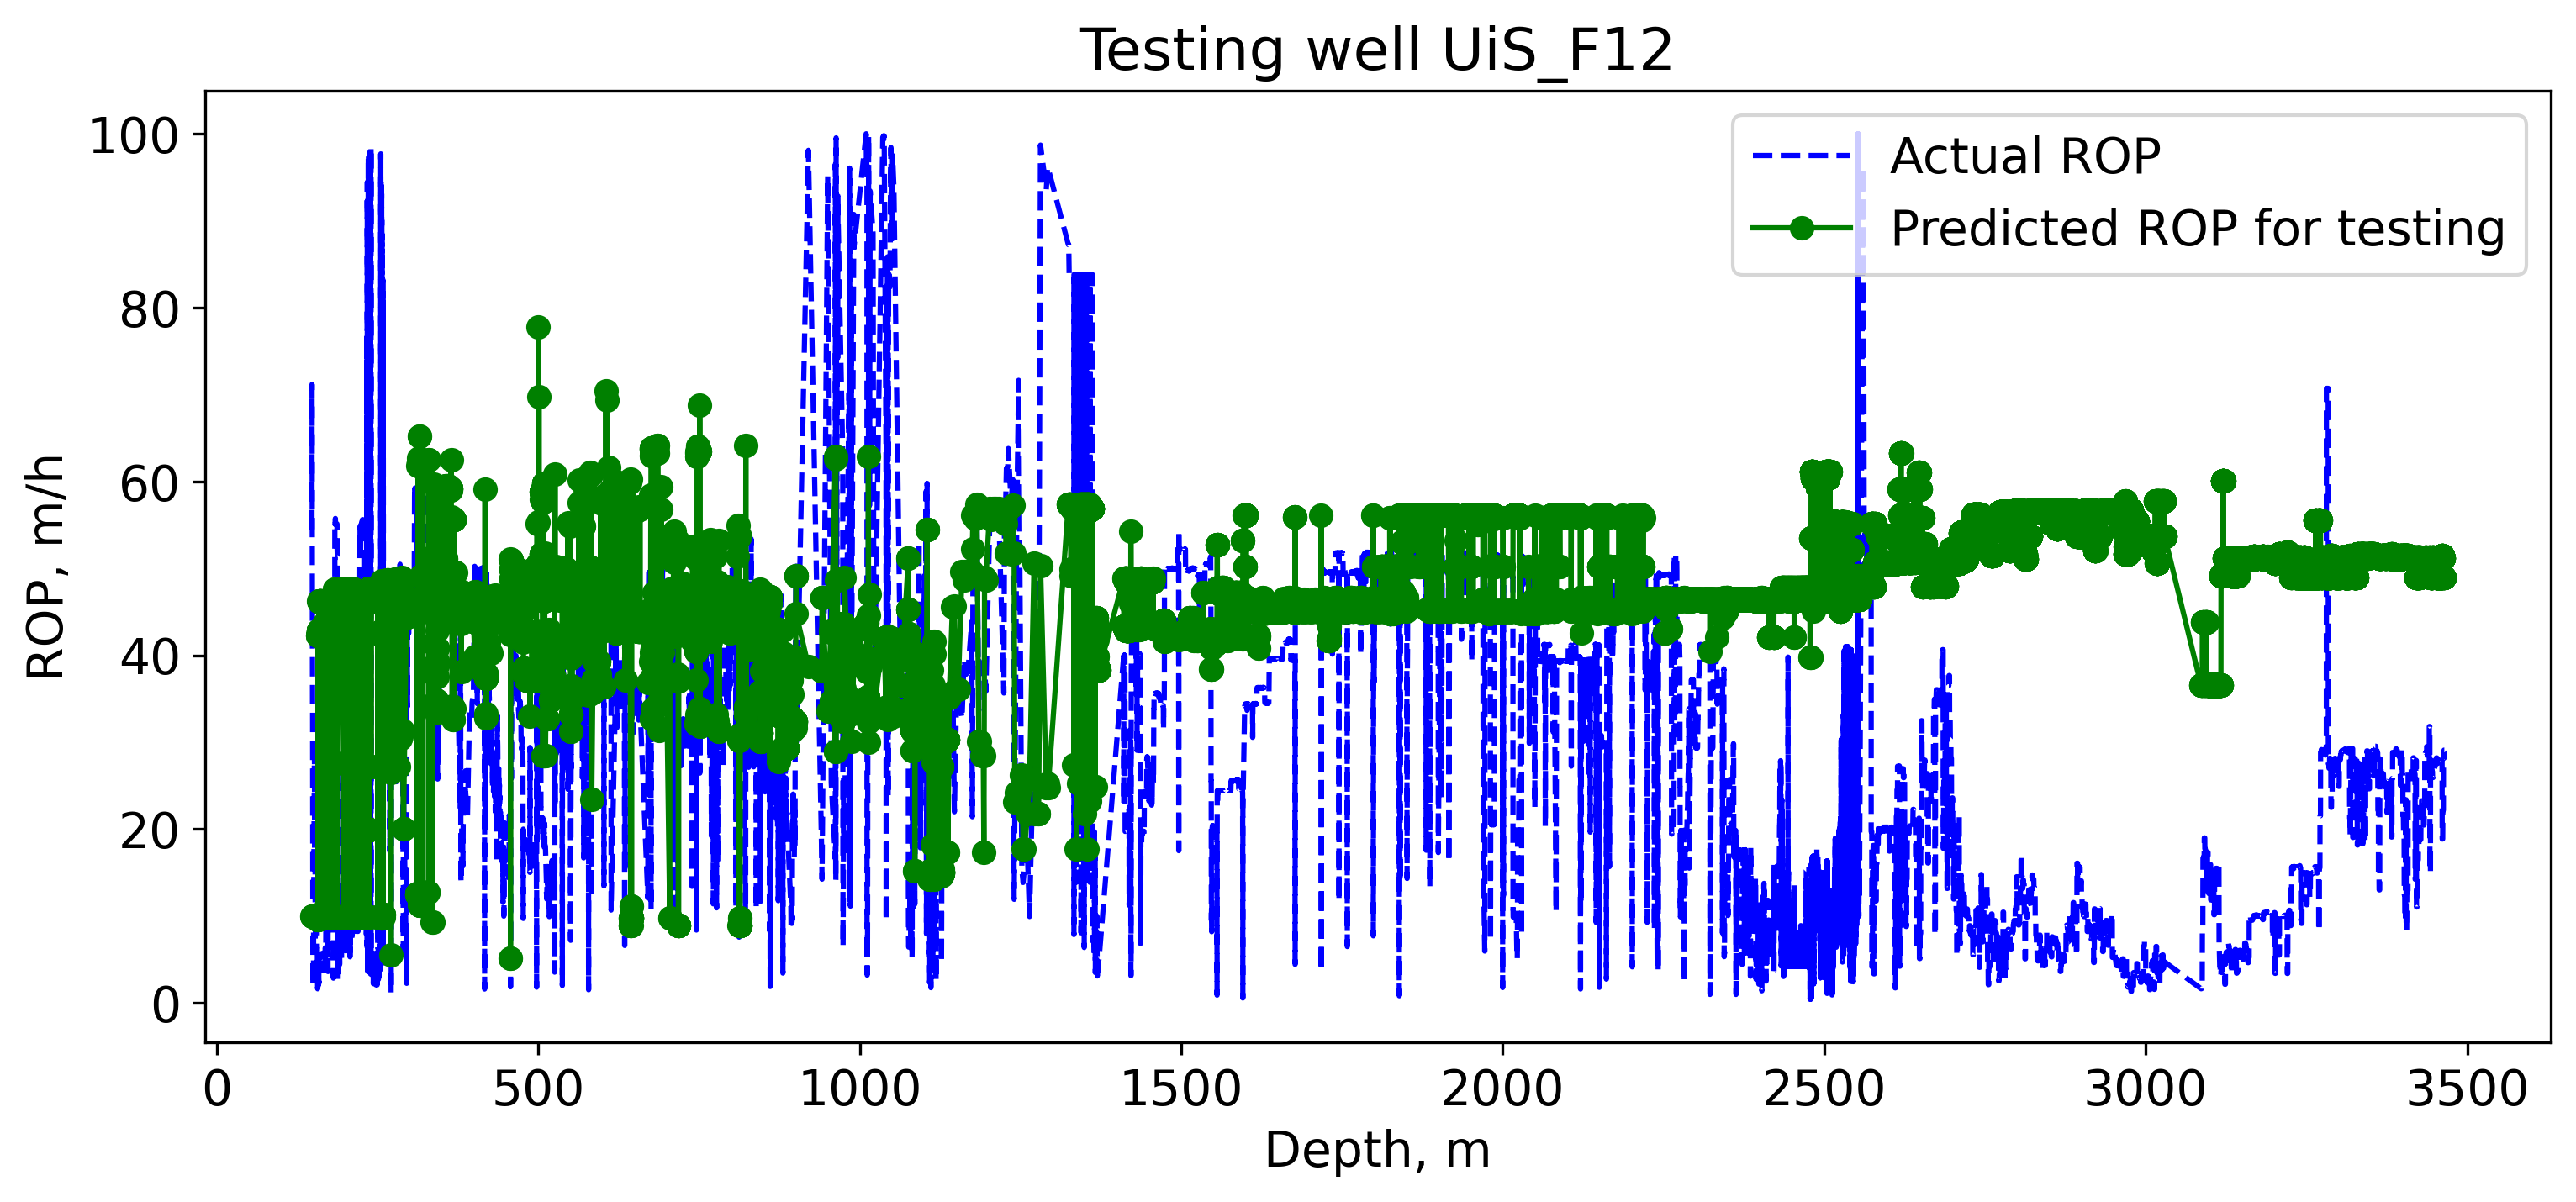

UiS_F4,UiS_F12,
UiS_F7
train_rmse: 0.6319511134998174
train_mape: 0.0068561053783342445
train_r2: 0.9990888953133739
test_rmse: 20.984648309433762
test_mape: 1.272828582136925
test_r2: -0.3177464907264431


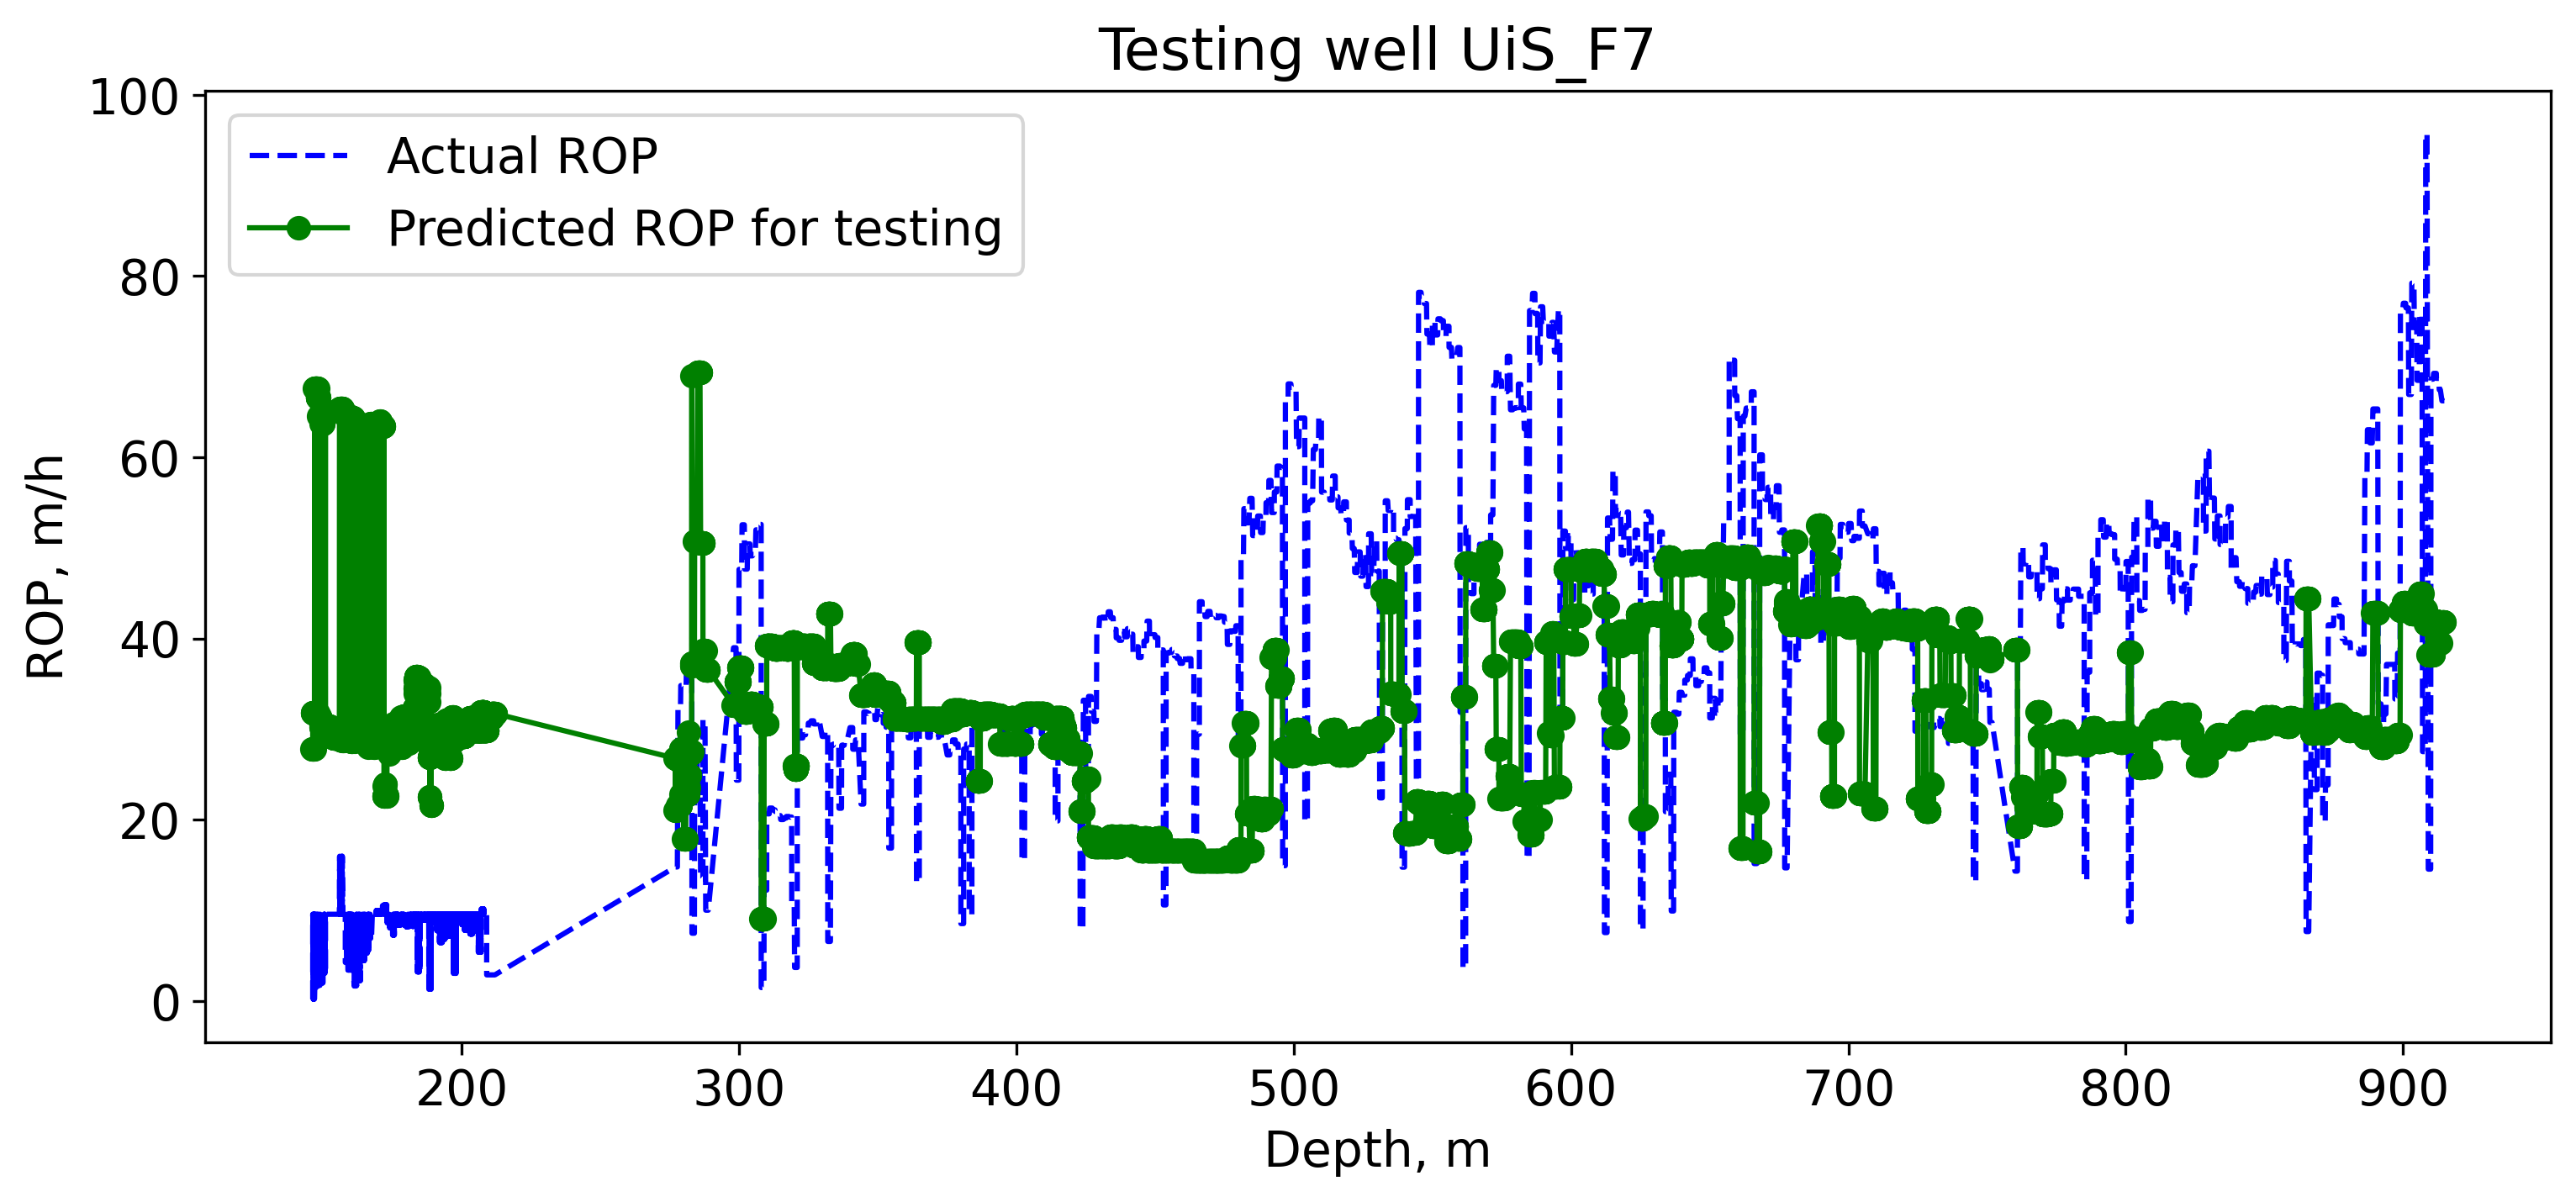

UiS_F4,UiS_F12,UiS_F7,
UiS_F9
train_rmse: 0.5847047225407778
train_mape: 0.006108512074201088
train_r2: 0.9992053560545191
test_rmse: 17.16258541379354
test_mape: 0.6885804513690758
test_r2: 0.5000033498560963


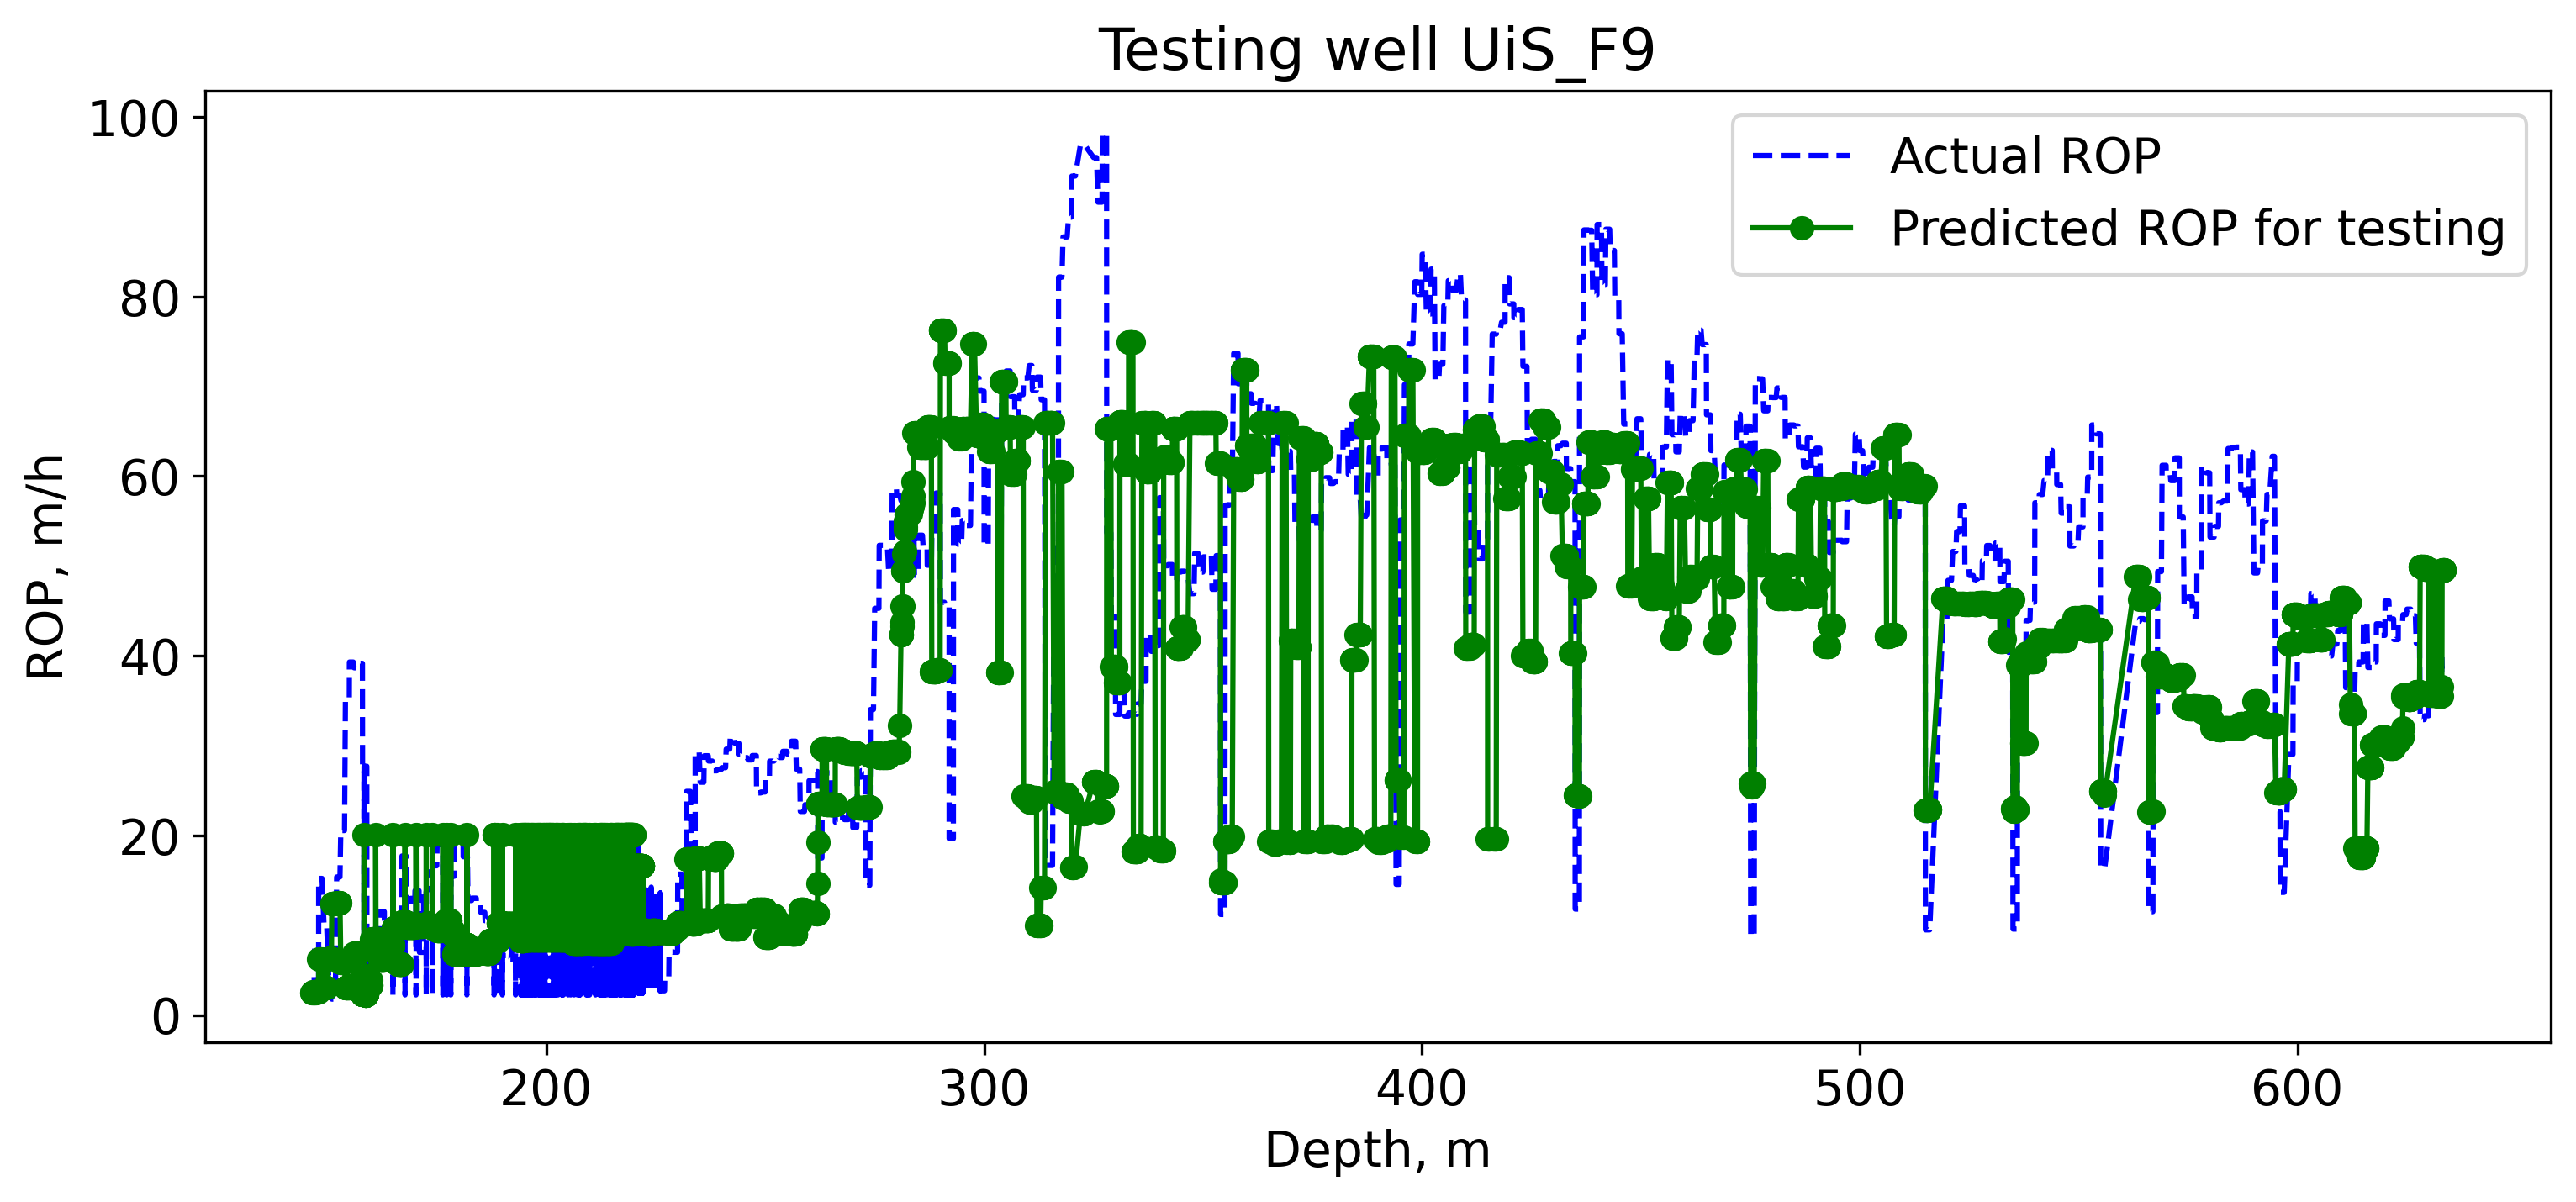

UiS_F4,UiS_F12,UiS_F7,UiS_F9,
UiS_F5
train_rmse: 0.5484496652014477
train_mape: 0.0053428351977352
train_r2: 0.999328253172318
test_rmse: 19.012890168750342
test_mape: 0.7506289781995782
test_r2: -0.4257243077045214


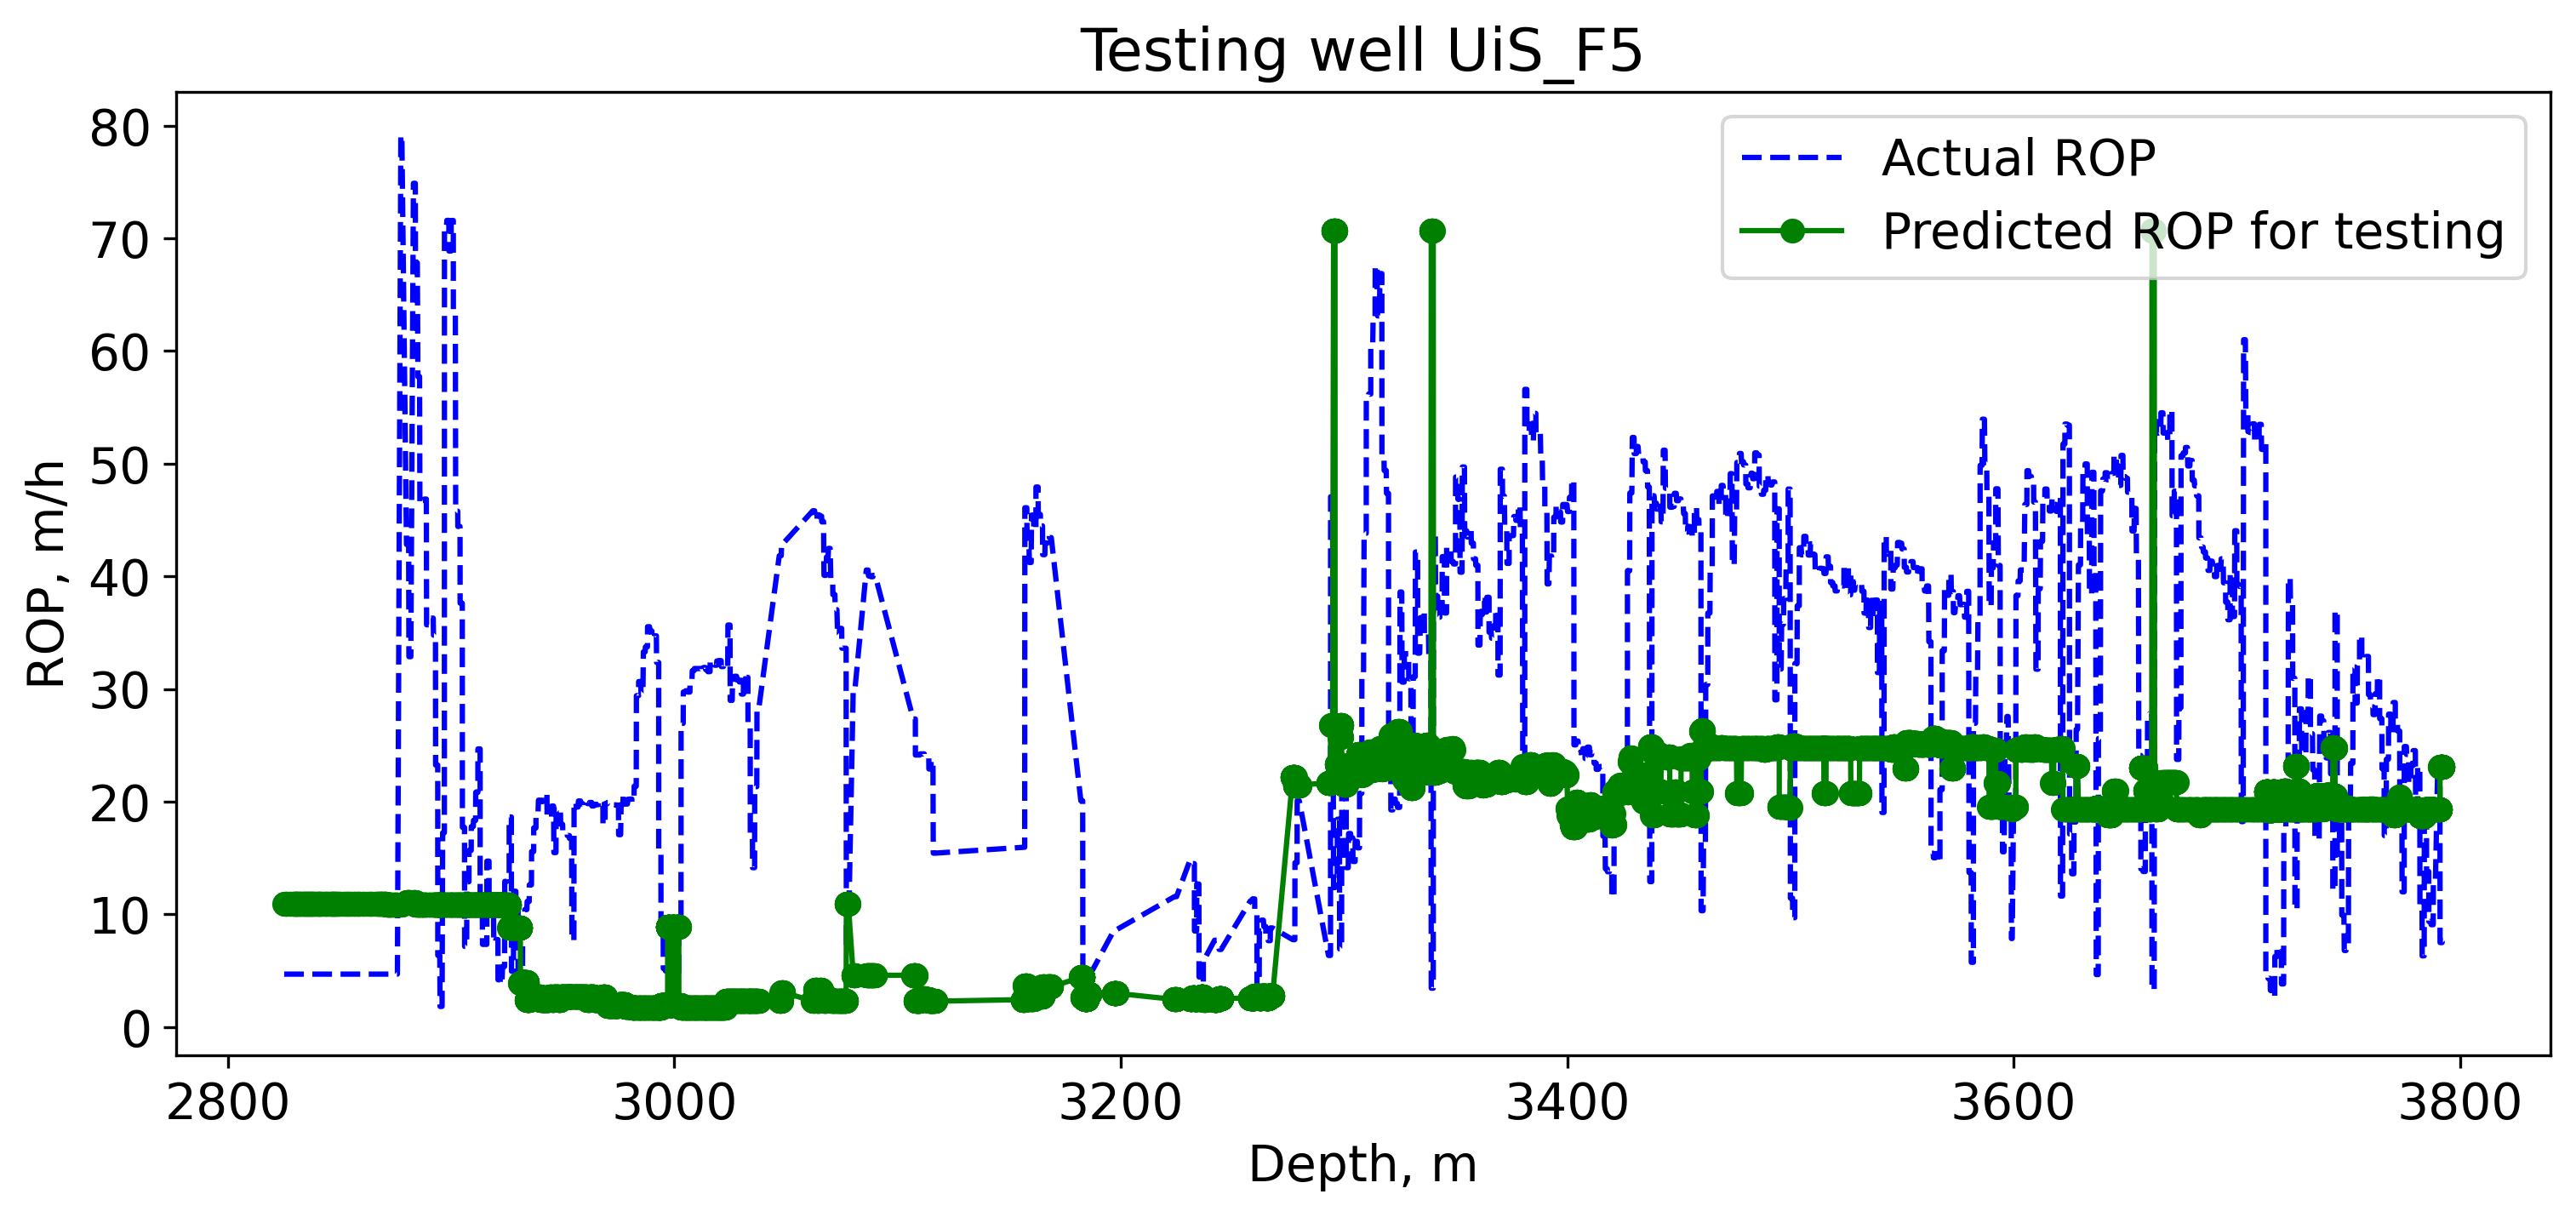

UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,
UiS_F14
train_rmse: 0.5053946678093477
train_mape: 0.004796701644538092
train_r2: 0.9993924838834972
test_rmse: 25.129565181087695
test_mape: 1.2001403290335924
test_r2: -2.224726882881642


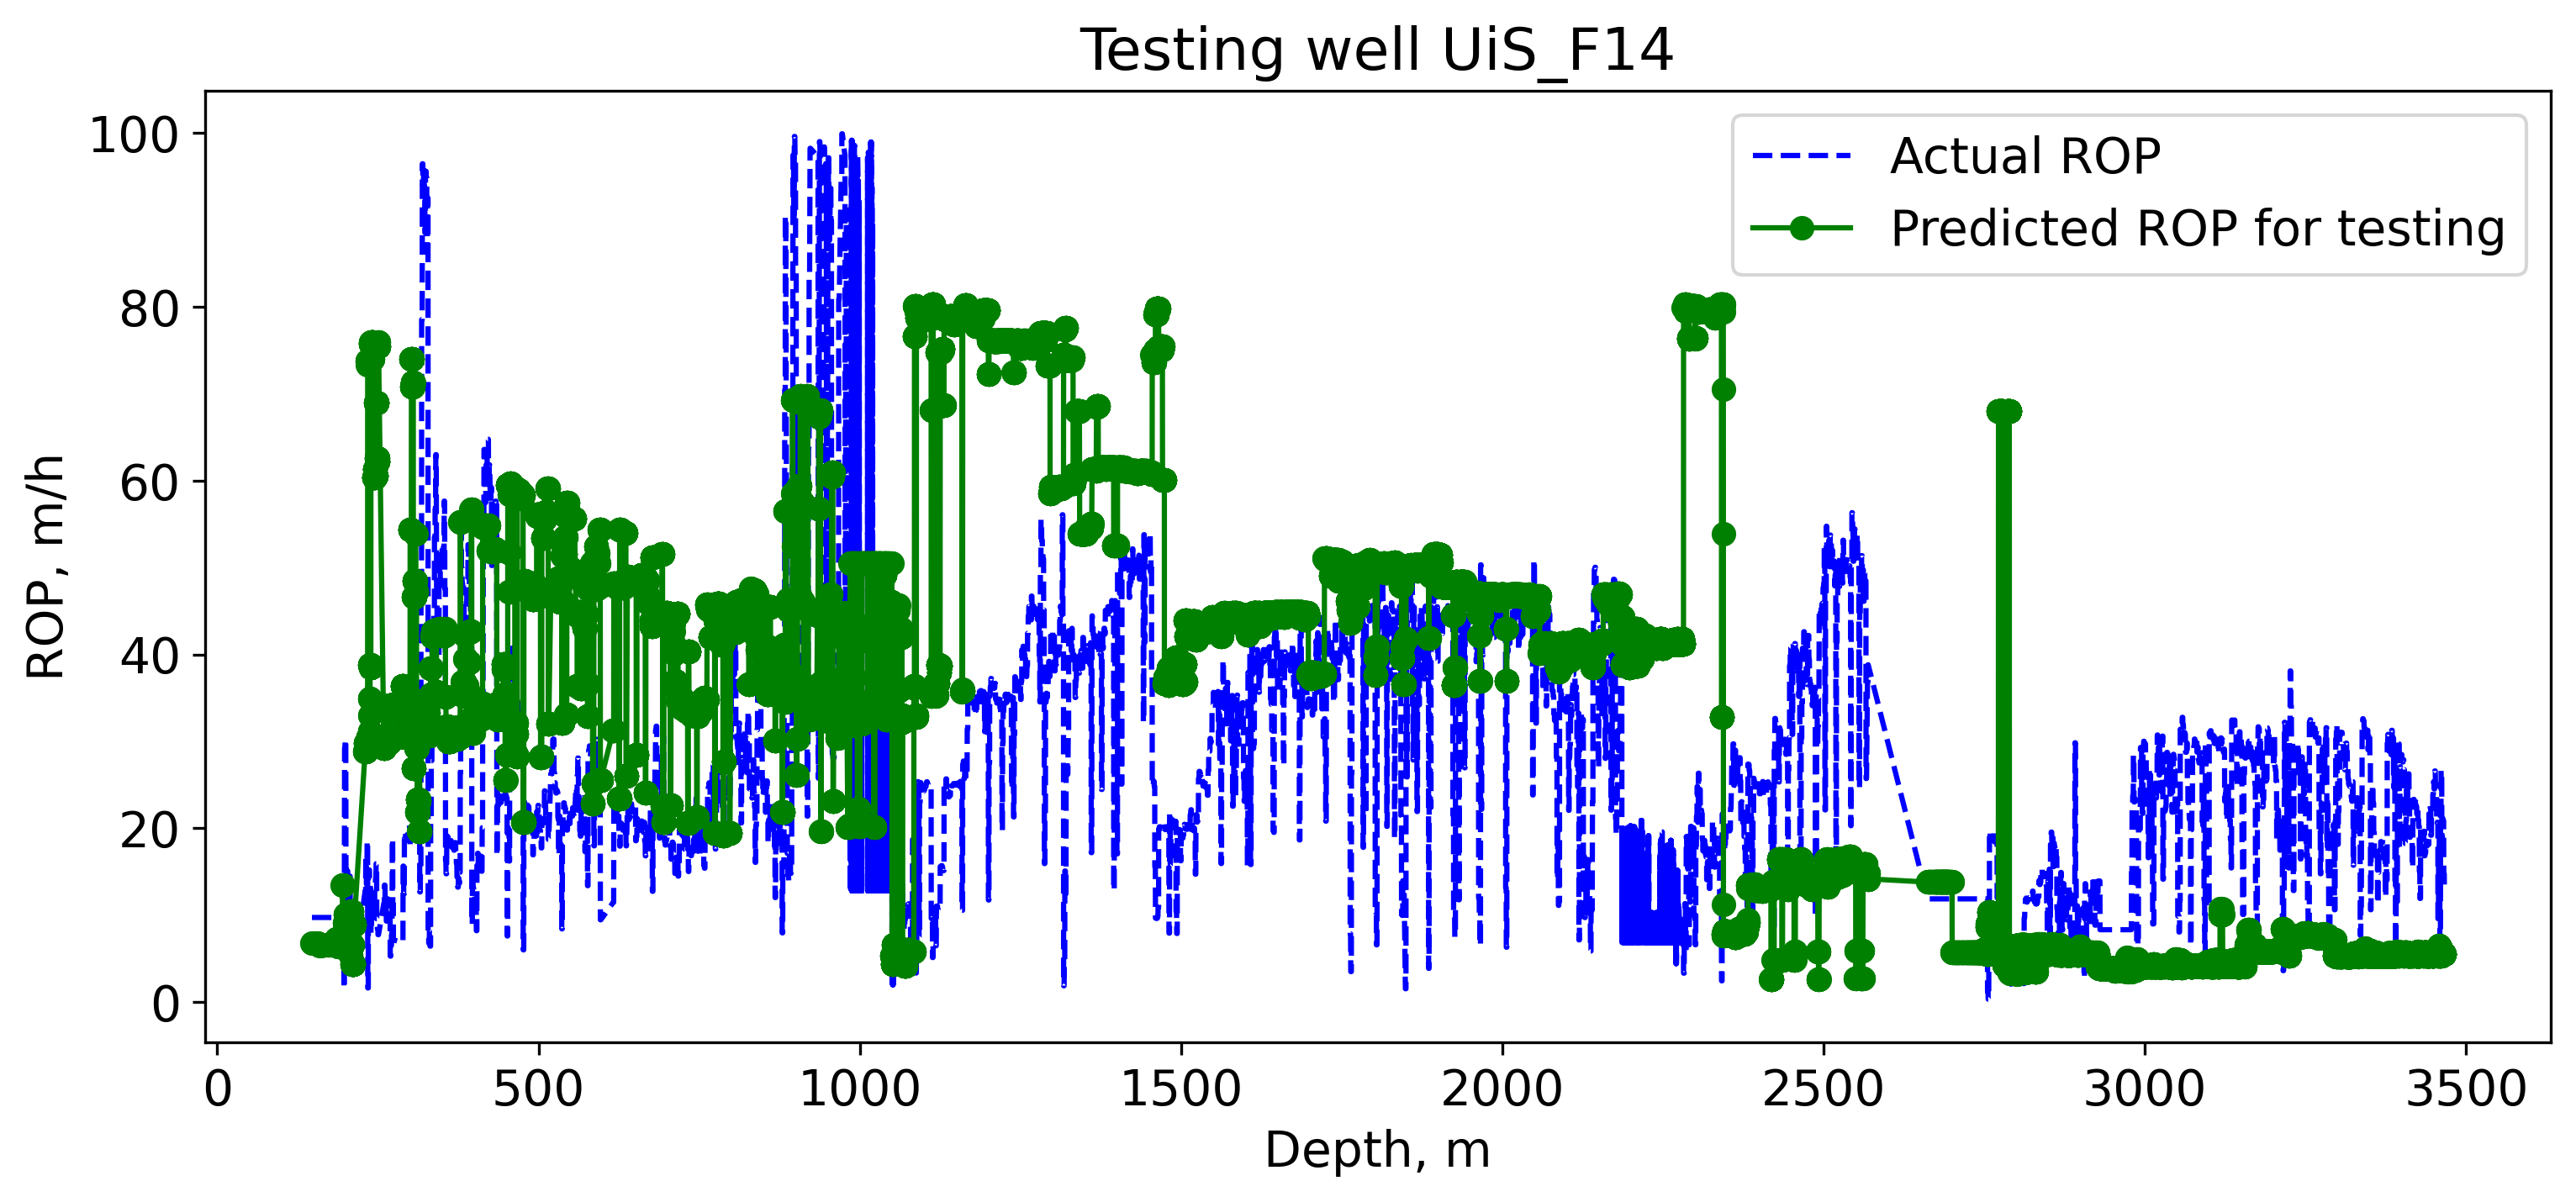

UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,
UiS_F15A
train_rmse: 0.4121637803968496
train_mape: 0.0033644994853426514
train_r2: 0.999514344363146
test_rmse: 27.441775669494028
test_mape: 3.0546791847229557
test_r2: -10.889981397752019


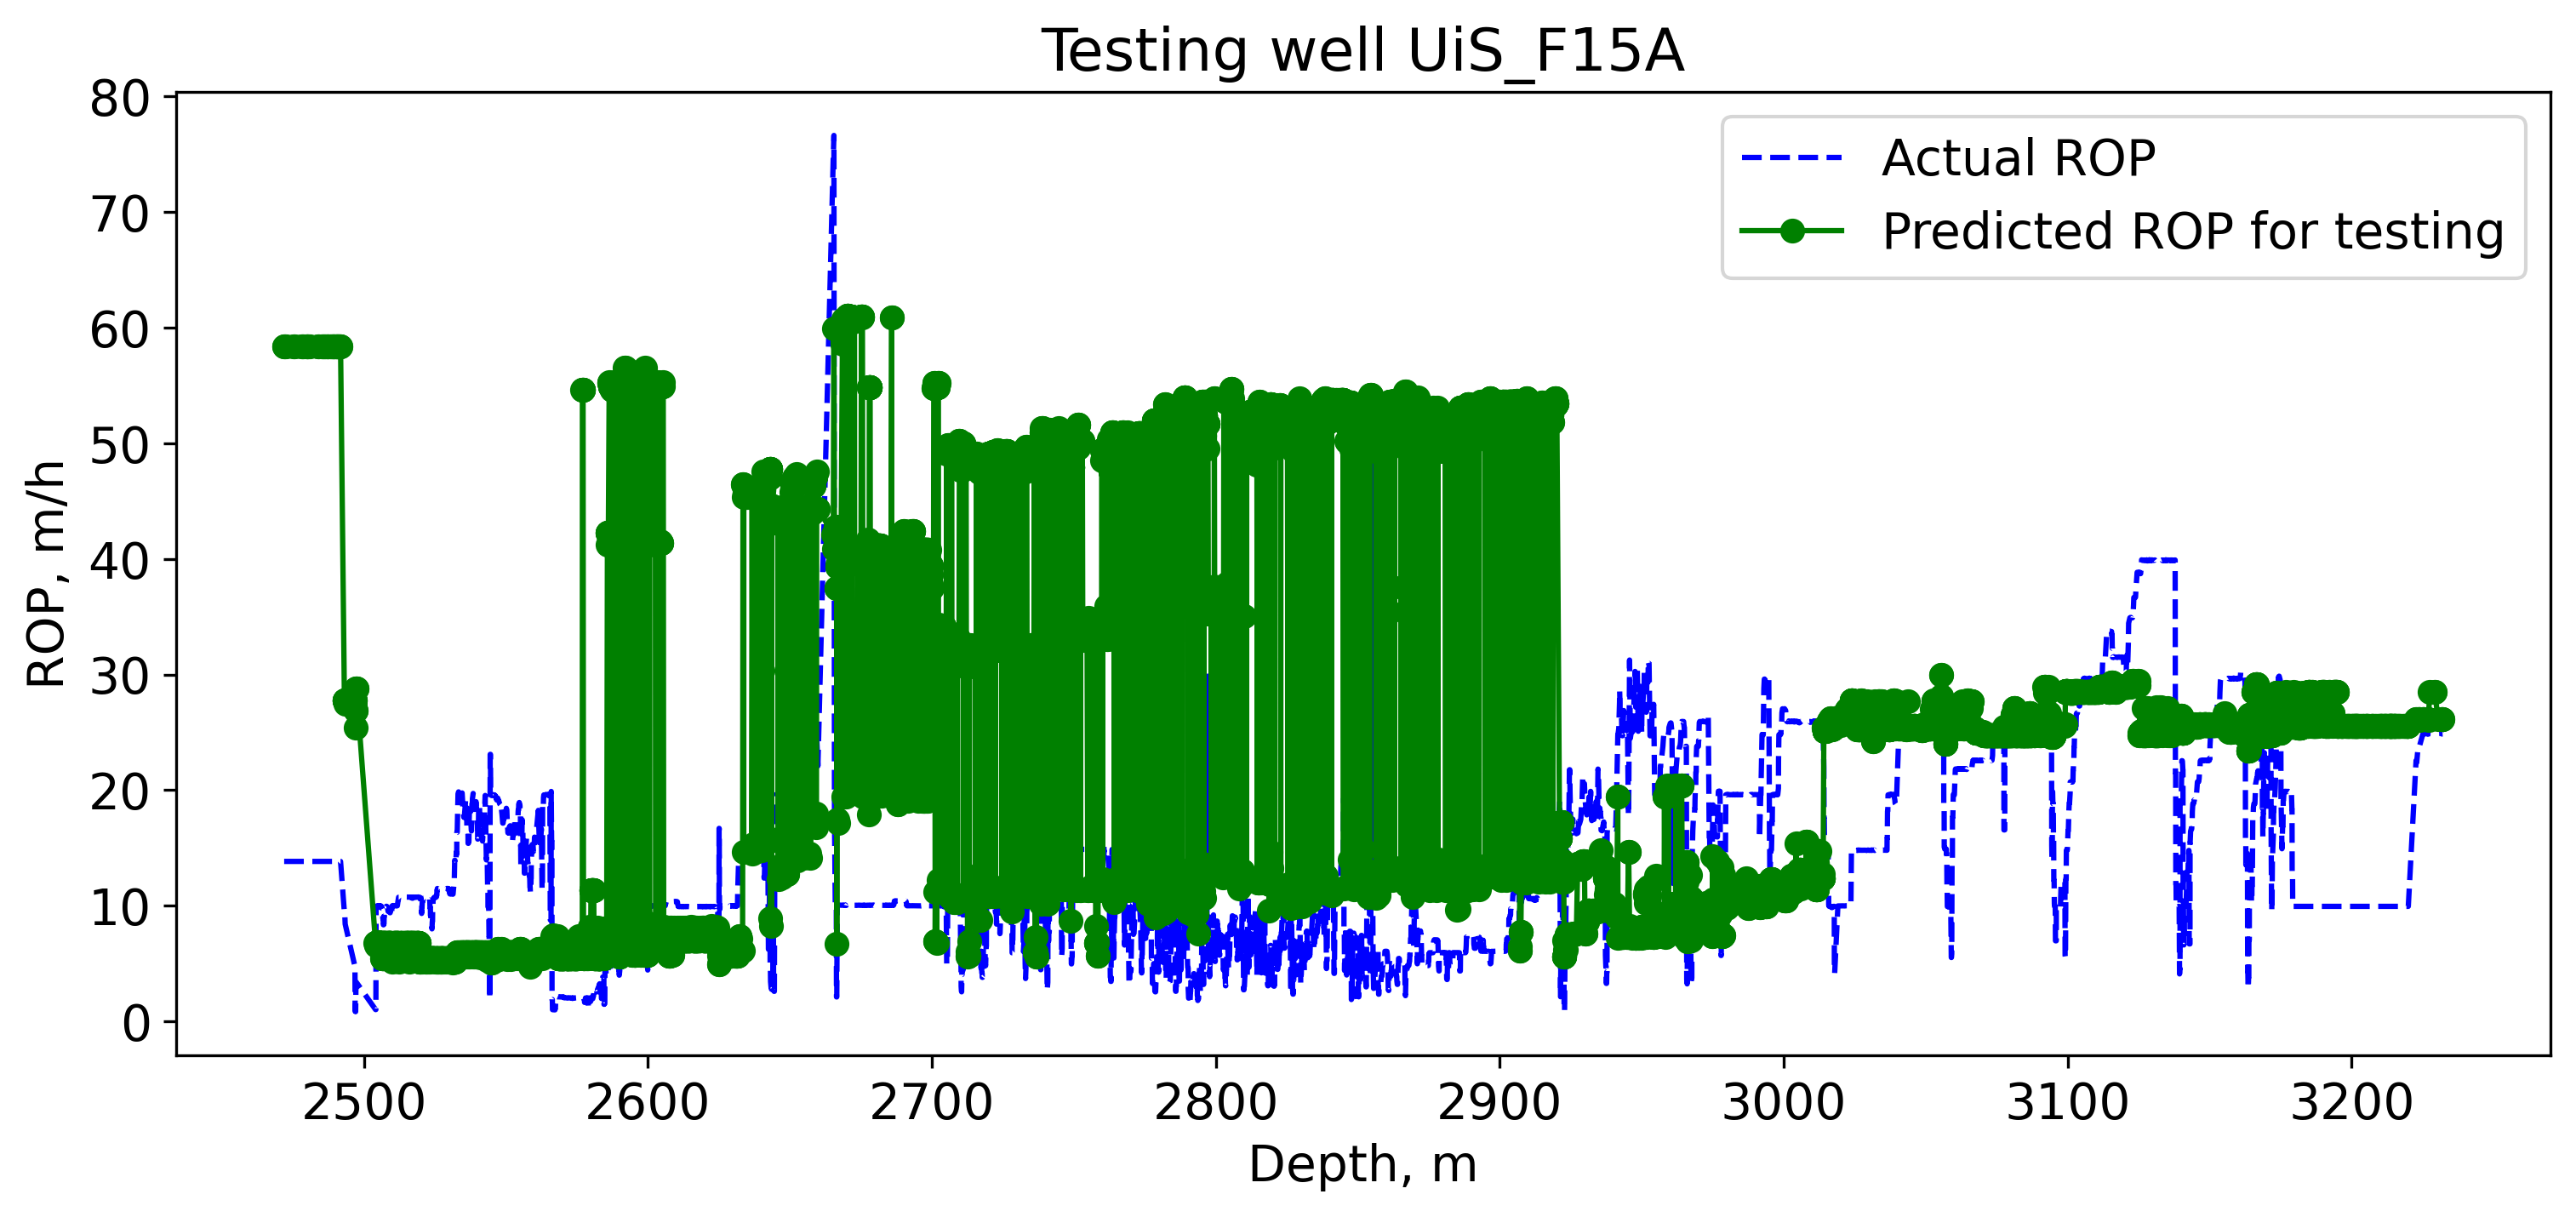

UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,UiS_F15A,
UiS_F10
train_rmse: 0.40807207985266664
train_mape: 0.0036422871592313878
train_r2: 0.9995147196696589
test_rmse: 14.84921910016261
test_mape: 1.7607954740285043
test_r2: -0.4042898221878273


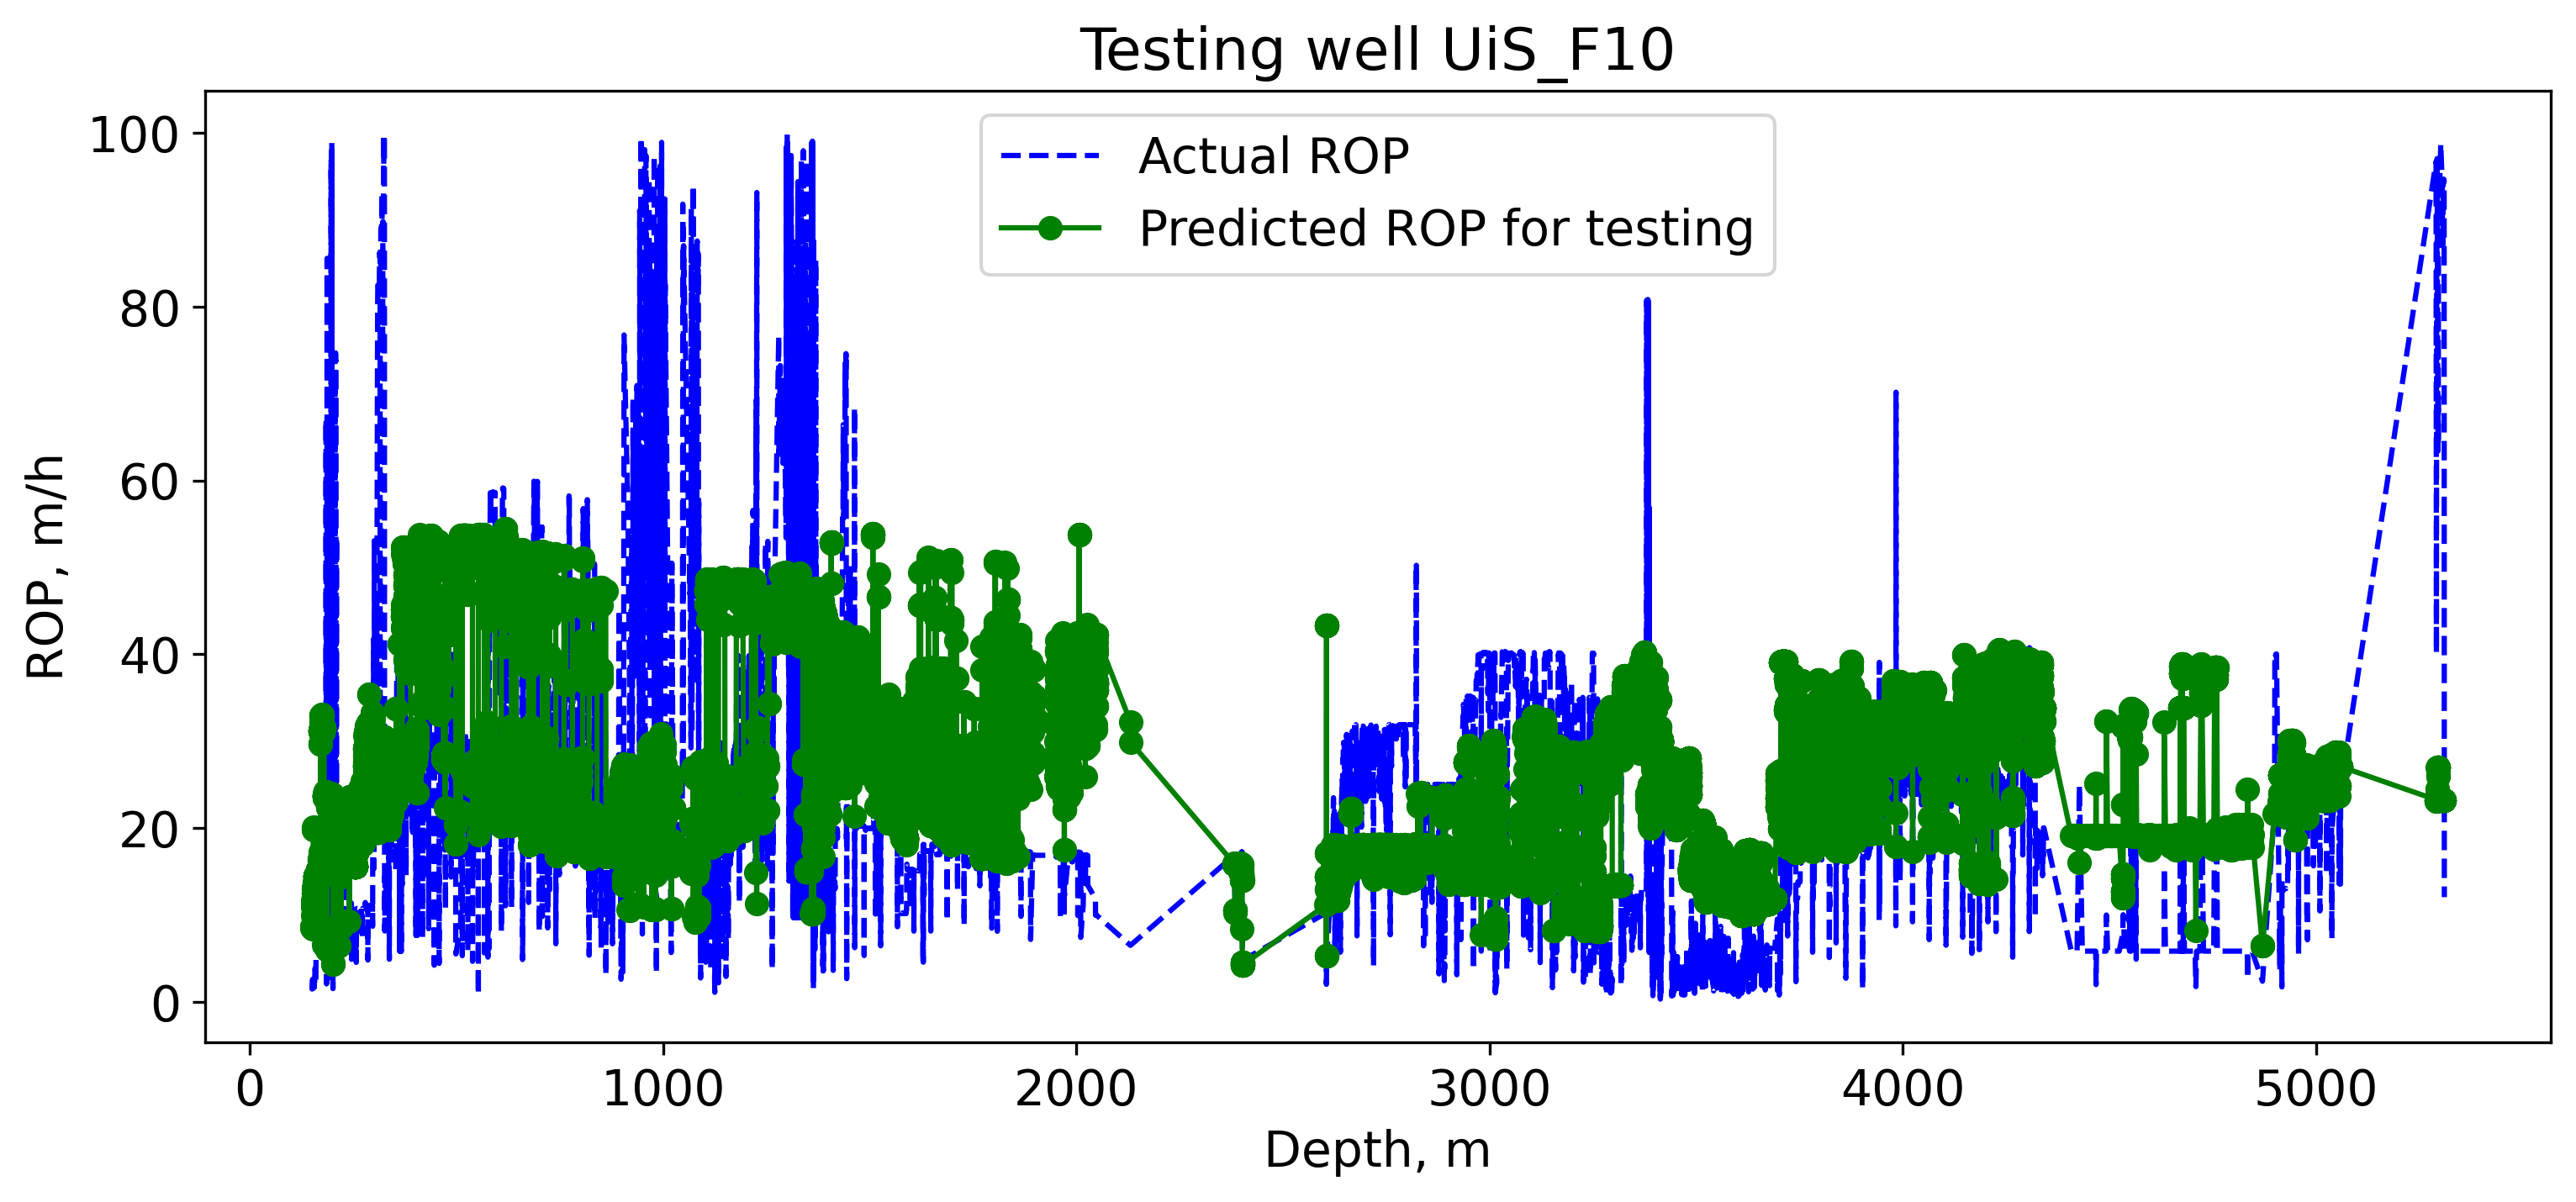

UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,UiS_F15A,UiS_F10,
UiS_F9A
train_rmse: 0.4931344675017657
train_mape: 0.004265141905448499
train_r2: 0.9991865574197685
test_rmse: 21.96377026511658
test_mape: 0.6798220769079668
test_r2: -2.36029812022223


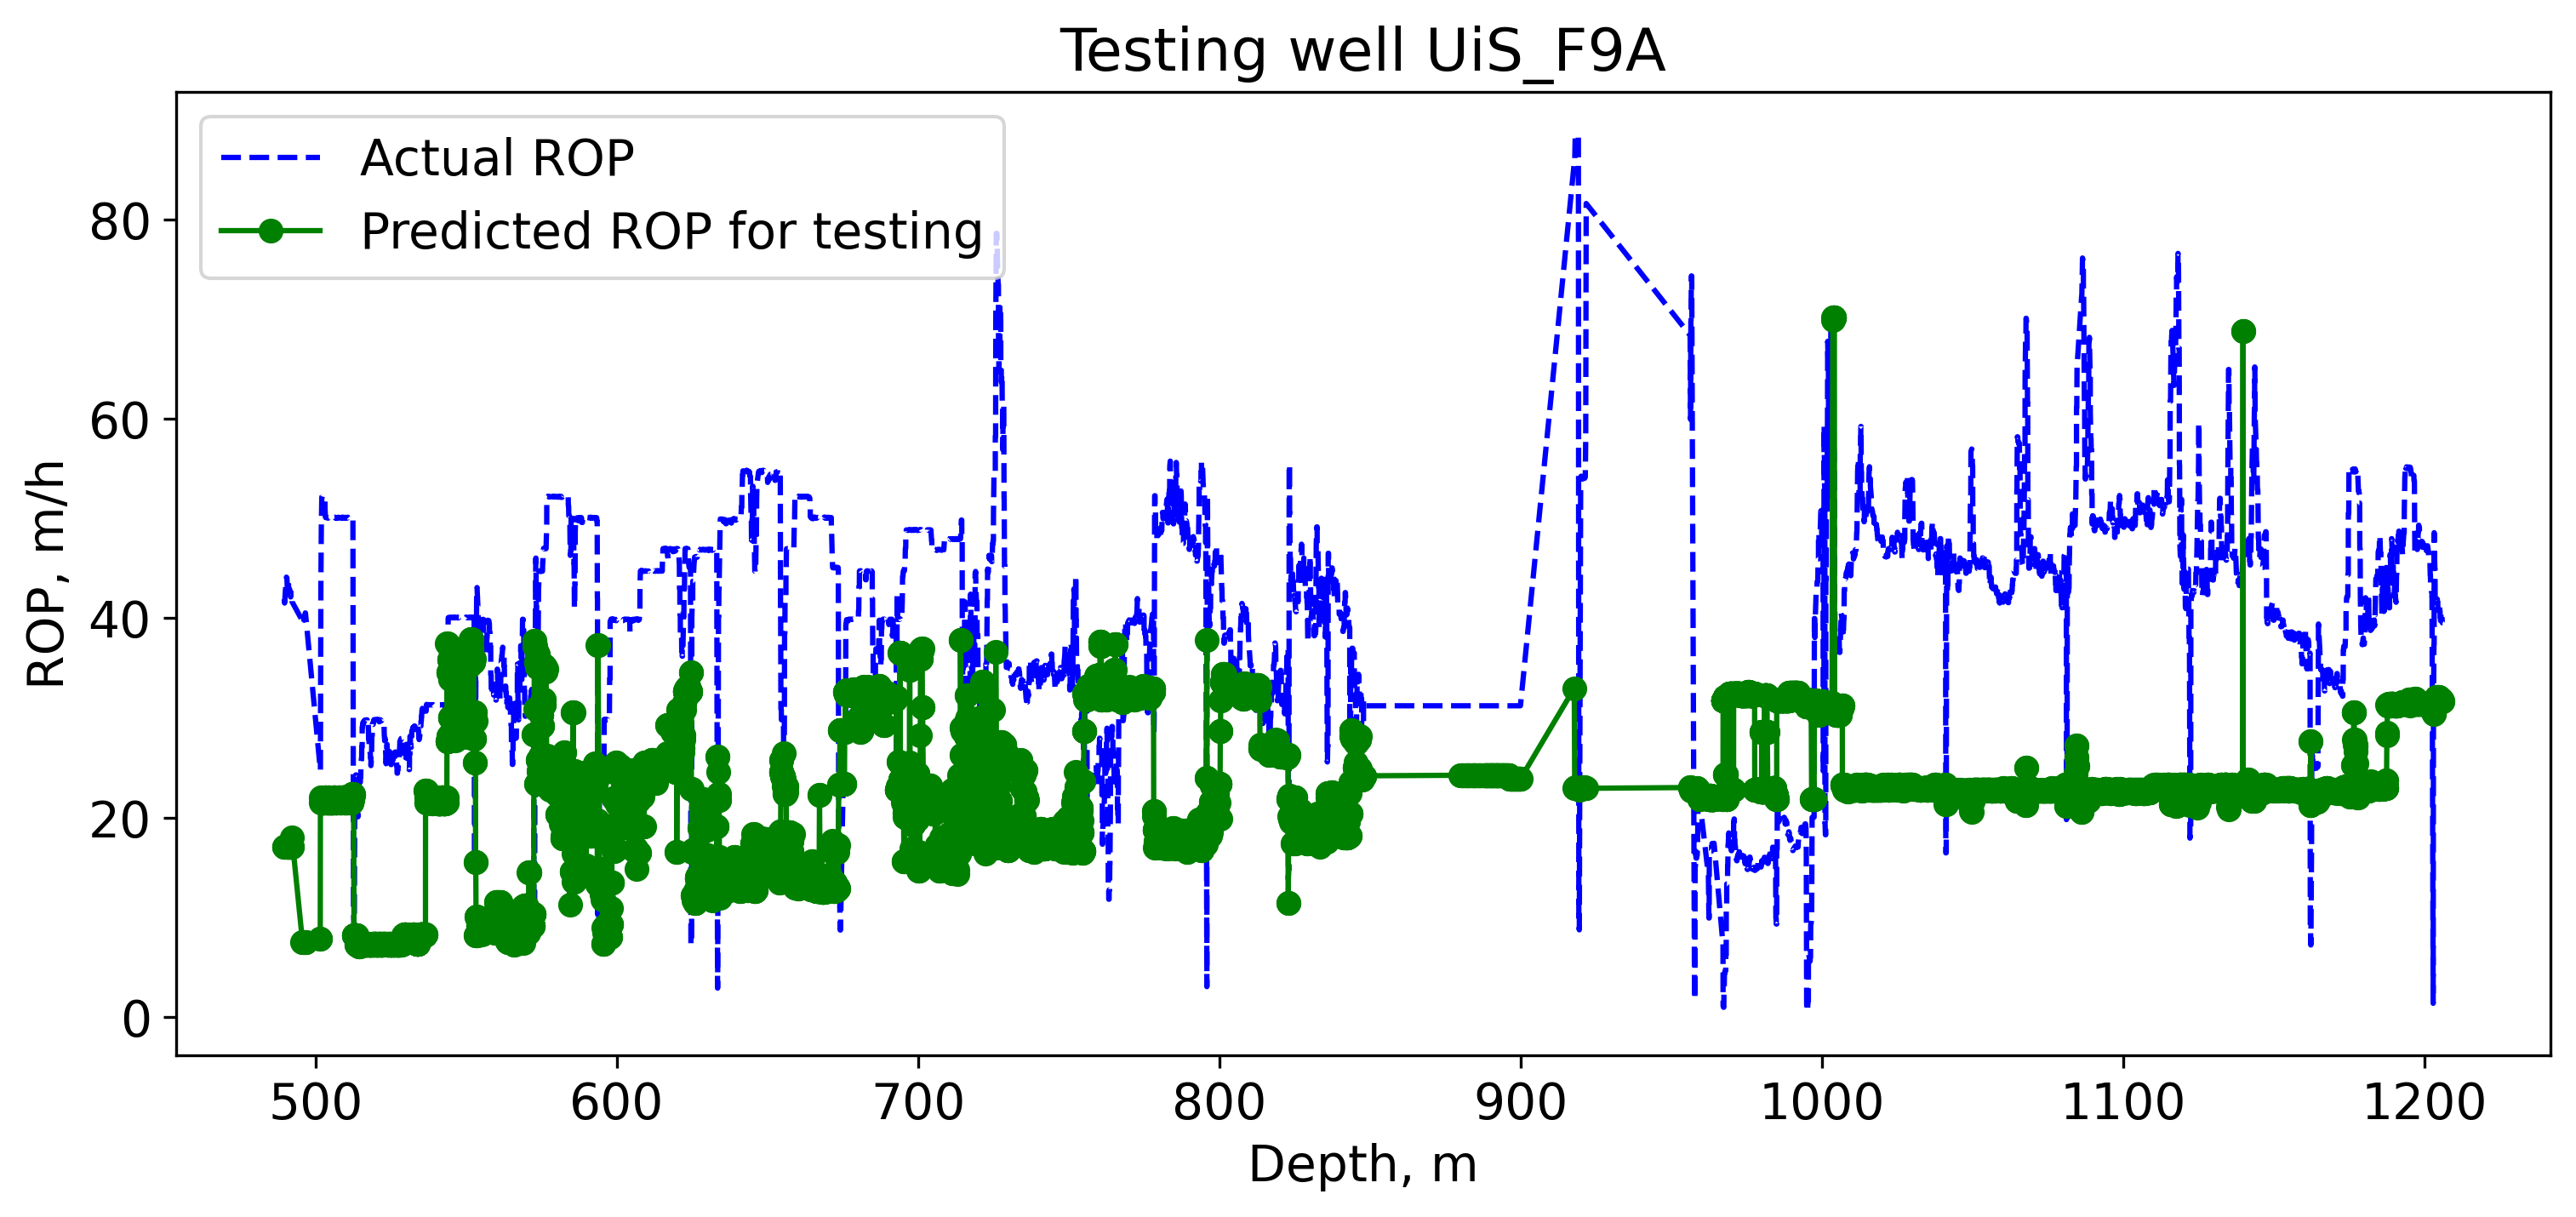

success


In [7]:
MLlist = [RandomForestRegressor(), MLPRegressor(), AdaBoostRegressor()]
rf = MLlist[0]
well_info  = pd.read_excel('well_information.xlsx')
well_info =  well_info.sort_values(by = 'Spud date',ignore_index=True)
well_name_list = well_info['Alias']
font = {'size' : 14}  
matplotlib.rc('font', **font)

metric_field = pd.DataFrame(columns=['train_well', 'test_well', 'train_rmse', 
                                     'train_mape', 'train_r2', 'test_rmse', 'test_mape','test_r2'])
for well_name_index,well_name in enumerate(well_name_list):
    if(well_name_index == 0):continue
    well_train_name_str =''
    df_train = pd.DataFrame()
    for i in range(well_name_index):
        well_data = data_handle(well_name_list[i] + '.csv')
        well_train_name_str = well_train_name_str +str(well_name_list[i]) +','
        df_train = df_train.append(well_data,ignore_index=True)
    df_test = data_handle(well_name + '.csv')
    y, y_2, train_predictions, test_predictions = evaluate_model(rf, df_train, df_test)

    train_rmse = np.sqrt(mean_squared_error(y, train_predictions))
    train_mape = mean_absolute_percentage_error(y, train_predictions)
    train_r2 = r2_score(y, train_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_2, test_predictions))
    test_mape = mean_absolute_percentage_error(y_2, test_predictions)
    test_r2 = r2_score(y_2, test_predictions)
    print(well_train_name_str)
    print(well_name)
    print('train_rmse:', train_rmse)
    print('train_mape:', train_mape)
    print('train_r2:', train_r2)
    print('test_rmse:', test_rmse)
    print('test_mape:', test_mape)
    print('test_r2:', test_r2)
    
    plt.figure(figsize=(12,5),dpi = 300)
    plt.plot(df_test['DEPTH'],df_test['ROP'],color='blue', marker=None, linestyle='--',label = 'Actual ROP')
    plt.plot(df_test['DEPTH'],test_predictions,color='g', marker='o', linestyle='-',label = 'Predicted ROP for testing')
    plt.xlabel("Depth, m")
    plt.ylabel("ROP, m/h")
    plt.title('Testing well '+ well_name)
    plt.legend()
    plt.show()
    metric_temp = [{'train_well': well_train_name_str, 'test_well':well_name, 'train_rmse':train_rmse, 
                    'train_mape':train_mape,'train_r2':train_r2, 'test_rmse':test_rmse, 'test_mape':test_mape, 'test_r2':test_r2}]
    metric_field = metric_field.append(metric_temp,ignore_index=True)
print('success')

In [8]:
metric_field

,train_well,test_well,train_rmse,train_mape,train_r2,test_rmse,test_mape,test_r2
0,"UiS_F4,",UiS_F12,0.175042,0.000397,0.999927,34.179925,4.350301,-3.086211
1,"UiS_F4,UiS_F12,",UiS_F7,0.631951,0.006856,0.999089,20.984648,1.272829,-0.317746
2,"UiS_F4,UiS_F12,UiS_F7,",UiS_F9,0.584705,0.006109,0.999205,17.162585,0.688580,0.500003
3,"UiS_F4,UiS_F12,UiS_F7,UiS_F9,",UiS_F5,0.548450,0.005343,0.999328,19.012890,0.750629,-0.425724
4,"UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,",UiS_F14,0.505395,0.004797,0.999392,25.129565,1.200140,-2.224727
5,"UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,",UiS_F15A,0.412164,0.003364,0.999514,27.441776,3.054679,-10.889981
6,"UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,Ui...",UiS_F10,0.408072,0.003642,0.999515,14.849219,1.760795,-0.404290
7,"UiS_F4,UiS_F12,UiS_F7,UiS_F9,UiS_F5,UiS_F14,Ui...",UiS_F9A,0.493134,0.004265,0.999187,21.963770,0.679822,-2.360298


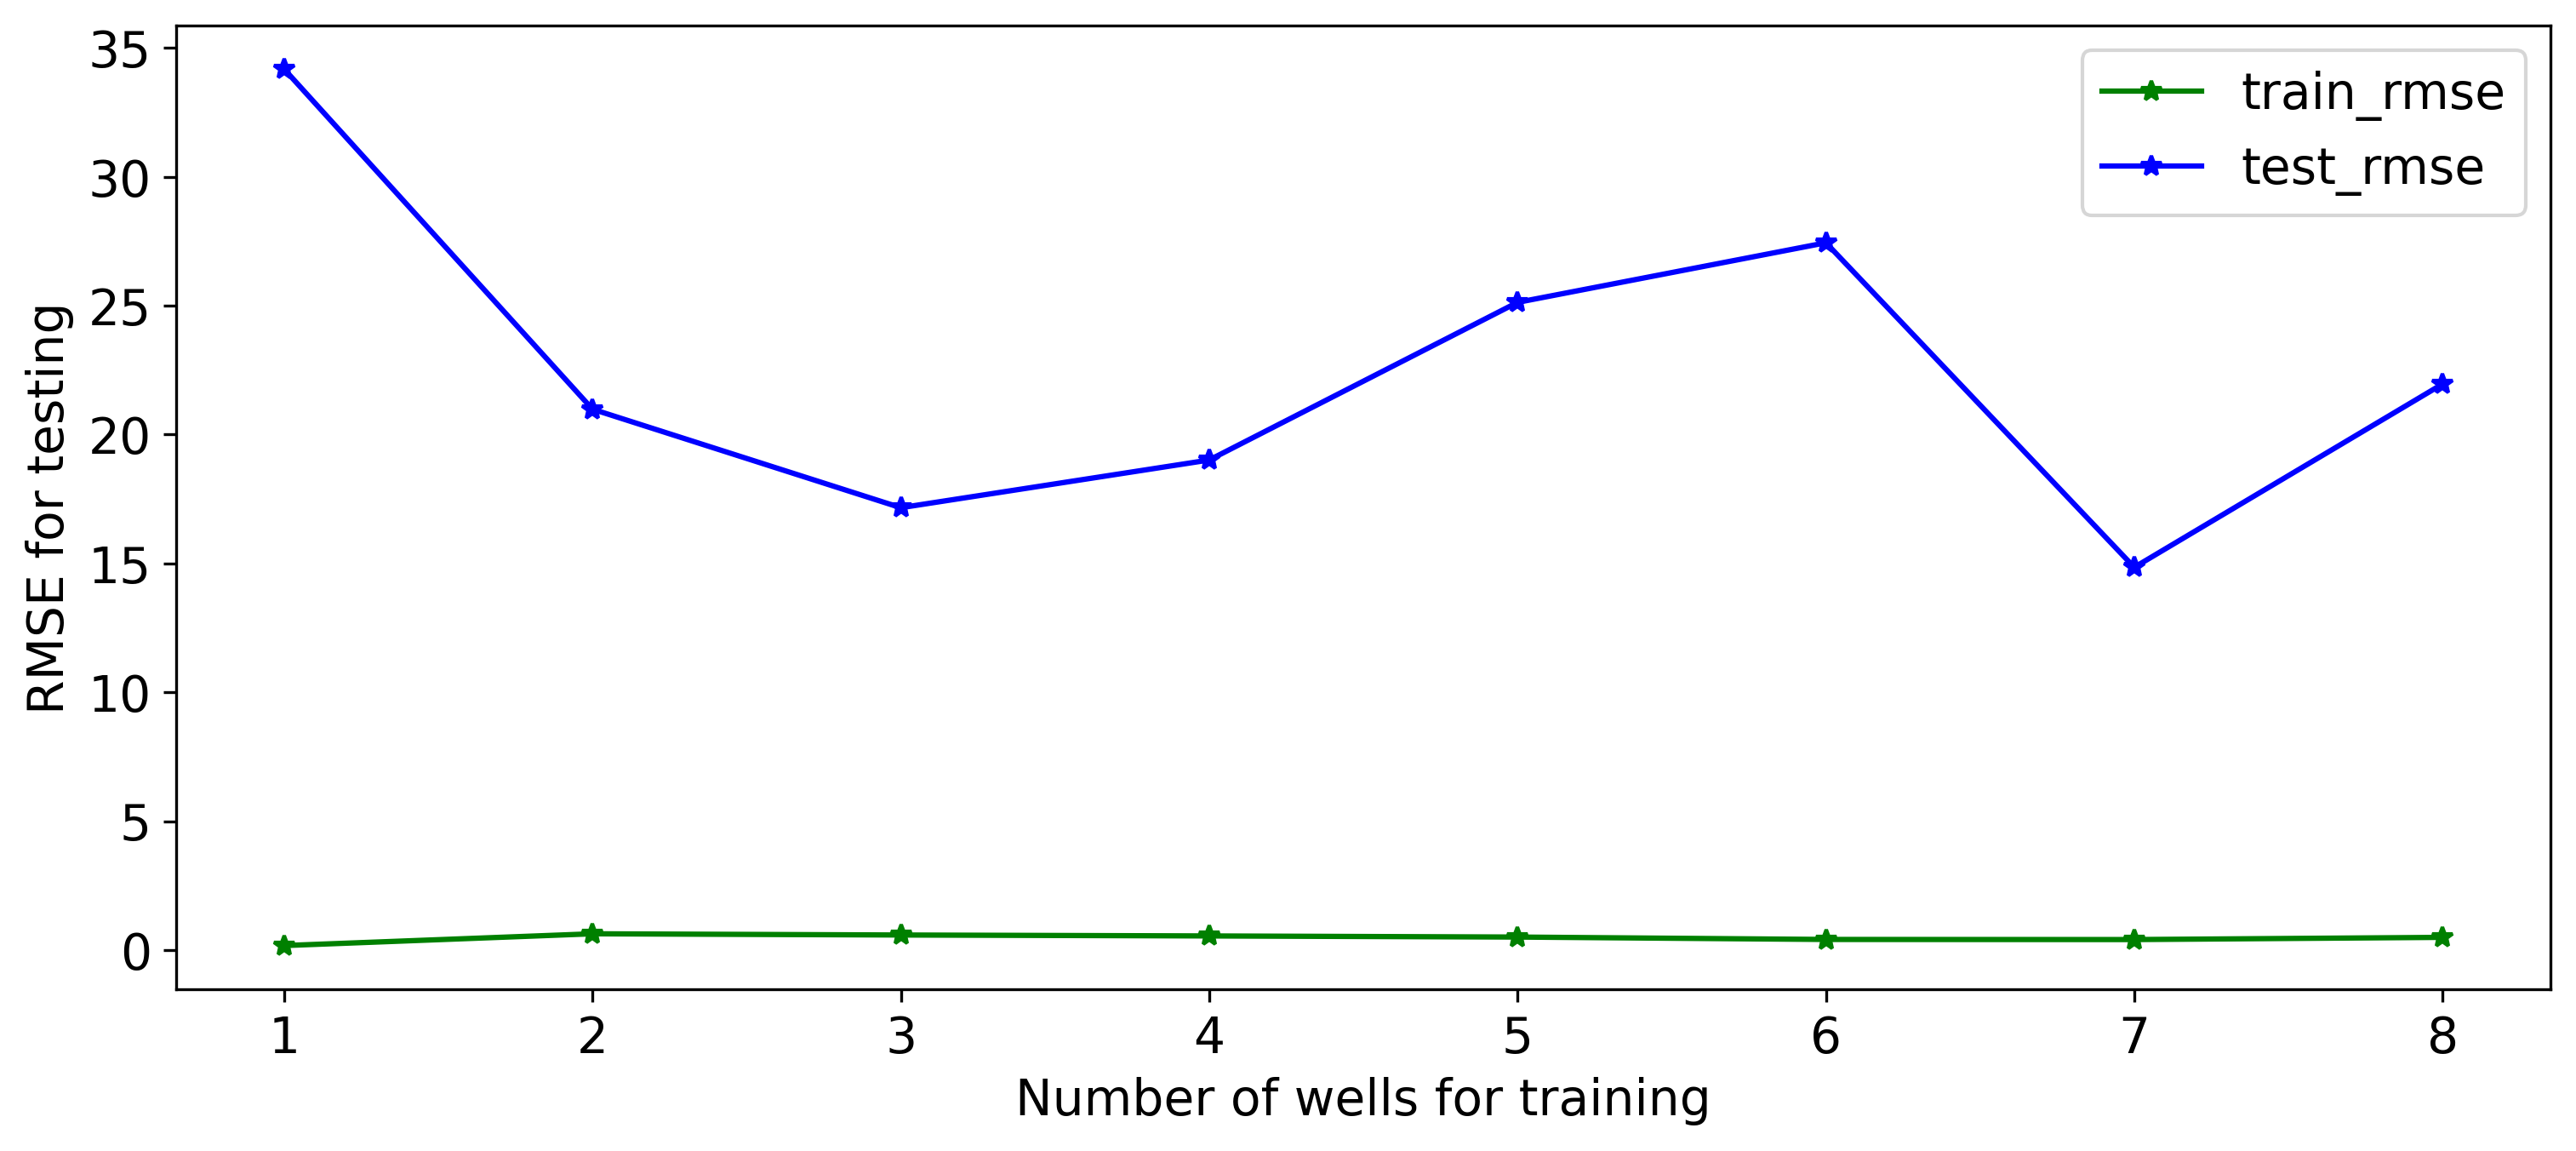

In [9]:
train_rmse=metric_field['train_rmse']
test_rmse=metric_field['test_rmse']
plt.figure(figsize=(12,5),dpi = 300)
xx = np.linspace(1,len(well_name_list)-1,len(well_name_list)-1)
plt.plot(xx, train_rmse, color='green', marker='*', linestyle='-', label='train_rmse')
plt.plot(xx, test_rmse, color='blue', marker='*', linestyle='-', label='test_rmse')
plt.legend()
plt.xlabel('Number of wells for training')
plt.ylabel('RMSE for testing')
plt.show()

In [10]:
metric_pd

NameError: name 'metric_pd' is not defined

In [ ]:
metric_pd.iloc[:,0:-1]

In [ ]:
train_rmse=metric_field['train_mape']
test_rmse=metric_field['test_mape']
plt.figure(figsize=(12,5),dpi = 300)
plt.plot(xx, train_rmse, color='green', marker='*', linestyle='-', label='train_mape')
plt.plot(xx, test_rmse, color='blue', marker='*', linestyle='-', label='test_mape')

plt.legend()
plt.xlabel('Number of wells for training')
plt.ylabel('MAPE for testing')
plt.show()

In [ ]:
## Use one well for testing and others for training

In [ ]:
MLlist = [RandomForestRegressor(), MLPRegressor(), AdaBoostRegressor()]
rf = MLlist[0]
well_info  = pd.read_excel('well_information.xlsx')
well_info =  well_info.sort_values(by = 'Spud date',ignore_index=True)
well_name_list = well_info['Alias']
path = 'result.xlsx'
writer = pd.ExcelWriter(path)

metric_pd = pd.DataFrame(columns=['test_well_name', 'train_rmse', 'train_mape', 'train_r2',
                                  'test_rmse', 'test_mape','test_r2'])
i = 1
for well_test in well_name_list:
    df_test = data_handle(well_test + '.csv')
    df_train = pd.DataFrame()
    for well_train in well_name_list:
        if( well_train == well_test):continue
        well_data = data_handle(well_train + '.csv')
        df_train = df_train.append(well_data,ignore_index=True)
    y, y_2, train_predictions, test_predictions = evaluate_model(rf, df_train, df_test)

    train_rmse = np.sqrt(mean_squared_error(y, train_predictions))
    train_mape = mean_absolute_percentage_error(y, train_predictions)
    train_r2 = r2_score(y, train_predictions)

    test_rmse = np.sqrt(mean_squared_error(y_2, test_predictions))
    test_mape = mean_absolute_percentage_error(y_2, test_predictions)
    test_r2 = r2_score(y_2, test_predictions)
#     print(well_test)
    
#     print('train_rmse:', train_rmse)
#     print('train_mape:', train_mape)
    print('train_r2:', train_r2)
#     print('test_rmse:', test_rmse)
#     print('test_mape:', test_mape)
#     print('test_r2:', test_r2)
    
    plt.figure(figsize=(12,5))
    plt.plot(df_test['DEPTH'],df_test['ROP'],color='blue', marker=None, linestyle='--',label = 'Actual ROP')
    plt.plot(df_test['DEPTH'],test_predictions,color='g', marker='o', linestyle='-',label = 'Predicted ROP')
    plt.xlabel("Depth, m")
    plt.ylabel("ROP, m/h")
    plt.title('Testing well: ' + well_test)
    plt.legend()
    plt.show()
    
    metric_pd.loc[i, 'test_well_name'] = well_test
    metric_pd.loc[i, 'train_rmse'] = train_rmse
    metric_pd.loc[i, 'train_mape'] = train_mape
    metric_pd.loc[i, 'train_r2'] = train_r2
    metric_pd.loc[i, 'test_rmse'] = test_rmse
    metric_pd.loc[i, 'test_mape'] = test_mape
    metric_pd.loc[i, 'test_r2'] = test_r2
    i = i+1
    metric_pd.head()
print('success')

In [ ]:
metric_pd

In [ ]:
metric_pd.plot.bar(x='test_well_name',y=['test_rmse','train_rmse'])

In [ ]:
metric_pd.plot.bar(x='test_well_name',y=['test_mape','train_mape'], label = ['MAPE for testing', 'MAPE for training'])

In [ ]:
metric_pd.plot.bar(x='test_well_name',y=['train_r2'])